In [1]:
import utils
import sys
import yaml
import dataset

C:\Users\eros\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
multi_config = {
	"Ensemble": None,
    "Unetv2": "D:\\weights\\checkpoint8",
	"Resnet101": "D:\\weights\\checkpoint12",
	"MobileNet": "D:\\weights\\checkpoint20",
	"SegformerMod": "D:\\weights\\segmod_heckpoint20",
}
config = {
	"num_classes": 15,
	"dataset": "D:\Datasets\GID15\gid-15\GID\Validation",
	"patch_size": 224,	
	'device':'gpu',
	'verbose':True,
	'ignore_background':False,
	"ensemble_config": "test.yaml"
}

device = utils.load_device(config)
data = {}
for netname, checkpoint in multi_config.items():
	config['net'] = netname
	print(f"Evaluating {netname}")
	config['load_checkpoint'] = checkpoint	
	net = utils.load_network(config, device).to(device)
	if checkpoint != None:
		utils.load_checkpoint(config, net)
	loader = dataset.Loader(config['dataset'], 1, patch_size=config['patch_size'])
	if 'images' in config.keys() : loader.specify(config['images'])			
	flat, normalized = utils.eval_model(net, 
		loader, 
		device, 
		1, 
		show_progress=config['verbose'],
		ignore_background=config['ignore_background'])
	confusion = flat.compute()	
	metrics = utils.print_metrics(confusion)
	data[netname] = metrics	


Training network on NVIDIA GeForce GTX 1060 6GB
Evaluating Ensemble
Loaded checkpoint D:\weights\checkpoint8
Loaded checkpoint D:\weights\checkpoint12
Loaded checkpoint D:\weights\checkpoint20
Loaded checkpoint D:\weights\segmod_heckpoint20
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS1__L1A0001064454-MSS1.tif


Chunk 1: 100%|██████████| 960/960 [02:03<00:00,  7.79it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS1__L1A0001118839-MSS1.tif



Chunk 2: 100%|██████████| 960/960 [02:07<00:00,  7.50it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS1__L1A0001395956-MSS1.tif



Chunk 3: 100%|██████████| 960/960 [02:02<00:00,  7.81it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS1__L1A0001680858-MSS1.tif



Chunk 4: 100%|██████████| 960/960 [02:01<00:00,  7.89it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0000718813-MSS2.tif



Chunk 5: 100%|██████████| 960/960 [02:02<00:00,  7.84it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001378501-MSS2.tif



Chunk 6: 100%|██████████| 960/960 [02:05<00:00,  7.68it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001471436-MSS2.tif



Chunk 7: 100%|██████████| 960/960 [02:05<00:00,  7.66it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001517494-MSS2.tif



Chunk 8: 100%|██████████| 960/960 [02:03<00:00,  7.74it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001787564-MSS2.tif



Chunk 9: 100%|██████████| 960/960 [02:03<00:00,  7.78it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001821754-MSS2.tif



Chunk 10: 100%|██████████| 960/960 [02:03<00:00,  7.74it/s]

Updating confusion matrix...
+--------+---------------------+
| Metric |               Score |
+--------+---------------------+
|   mIoU | 0.42954108119010925 |
|  mPrec |  0.6583727598190308 |
|   mRec |  0.5231001377105713 |
|   Dice |    0.55283123254776 |
|     OA |  0.7563959757486979 |
+--------+---------------------+
Excluded classes (not in target): []
+----------------------+----------------------+
|                Class |                  IoU |
+----------------------+----------------------+
|            unlabeled |   0.6108530163764954 |
|      industrial land |   0.5415536165237427 |
|    urban residential |   0.6413780450820923 |
|    rural residential |   0.4644148647785187 |
|         traffic land |   0.3921808898448944 |
|          paddy field |    0.545327365398407 |
|   irrigated cropland |   0.7287577390670776 |
|         dry cropland | 0.010316040366888046 |
|          garden plot |  0.03242997080087662 |
|         arbor forest |   0.7121991515159607 |
|           s

Evaluating Unetv2
Loaded checkpoint D:\weights\checkpoint8
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS1__L1A0001064454-MSS1.tif


Chunk 1: 100%|██████████| 960/960 [00:37<00:00, 25.72it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS1__L1A0001118839-MSS1.tif



Chunk 2: 100%|██████████| 960/960 [00:37<00:00, 25.79it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS1__L1A0001395956-MSS1.tif



Chunk 3: 100%|██████████| 960/960 [00:37<00:00, 25.67it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS1__L1A0001680858-MSS1.tif



Chunk 4: 100%|██████████| 960/960 [00:37<00:00, 25.52it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0000718813-MSS2.tif



Chunk 5: 100%|██████████| 960/960 [00:37<00:00, 25.30it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001378501-MSS2.tif



Chunk 6: 100%|██████████| 960/960 [00:37<00:00, 25.86it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001471436-MSS2.tif



Chunk 7: 100%|██████████| 960/960 [00:36<00:00, 26.07it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001517494-MSS2.tif



Chunk 8: 100%|██████████| 960/960 [00:36<00:00, 26.18it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001787564-MSS2.tif



Chunk 9: 100%|██████████| 960/960 [00:36<00:00, 26.09it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001821754-MSS2.tif



Chunk 10: 100%|██████████| 960/960 [00:36<00:00, 26.16it/s]

Updating confusion matrix...
+--------+---------------------+
| Metric |               Score |
+--------+---------------------+
|   mIoU |  0.2872416079044342 |
|  mPrec |  0.5380052328109741 |
|   mRec |  0.3845590353012085 |
|   Dice | 0.38127613067626953 |
|     OA |  0.6933811504338063 |
+--------+---------------------+
Excluded classes (not in target): []
+----------------------+-----------------------+
|                Class |                   IoU |
+----------------------+-----------------------+
|            unlabeled |    0.5594379901885986 |
|      industrial land |    0.4657061994075775 |
|    urban residential |    0.5618806481361389 |
|    rural residential |   0.35712966322898865 |
|         traffic land |    0.3366756737232208 |
|          paddy field |   0.09304352849721909 |
|   irrigated cropland |    0.6717448234558105 |
|         dry cropland |  0.000915168144274503 |
|          garden plot |  0.008076216094195843 |
|         arbor forest |    0.6905279755592346 |


Evaluating Resnet101
Loaded checkpoint D:\weights\checkpoint12
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS1__L1A0001064454-MSS1.tif


Chunk 1: 100%|██████████| 960/960 [00:54<00:00, 17.54it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS1__L1A0001118839-MSS1.tif



Chunk 2: 100%|██████████| 960/960 [00:56<00:00, 16.86it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS1__L1A0001395956-MSS1.tif



Chunk 3: 100%|██████████| 960/960 [00:54<00:00, 17.64it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS1__L1A0001680858-MSS1.tif



Chunk 4: 100%|██████████| 960/960 [00:54<00:00, 17.77it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0000718813-MSS2.tif



Chunk 5: 100%|██████████| 960/960 [00:52<00:00, 18.23it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001378501-MSS2.tif



Chunk 6: 100%|██████████| 960/960 [00:52<00:00, 18.43it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001471436-MSS2.tif



Chunk 7: 100%|██████████| 960/960 [00:52<00:00, 18.34it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001517494-MSS2.tif



Chunk 8: 100%|██████████| 960/960 [00:51<00:00, 18.53it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001787564-MSS2.tif



Chunk 9: 100%|██████████| 960/960 [00:51<00:00, 18.53it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001821754-MSS2.tif



Chunk 10: 100%|██████████| 960/960 [00:53<00:00, 18.04it/s]

Updating confusion matrix...
+--------+---------------------+
| Metric |               Score |
+--------+---------------------+
|   mIoU | 0.44329726696014404 |
|  mPrec |  0.6181712746620178 |
|   mRec |  0.5839636325836182 |
|   Dice |  0.5711365938186646 |
|     OA |  0.7515284427980177 |
+--------+---------------------+
Excluded classes (not in target): []
+----------------------+---------------------+
|                Class |                 IoU |
+----------------------+---------------------+
|            unlabeled |  0.6012789607048035 |
|      industrial land |  0.5537941455841064 |
|    urban residential |  0.6467050313949585 |
|    rural residential | 0.48842960596084595 |
|         traffic land |  0.4669257402420044 |
|          paddy field | 0.19178351759910583 |
|   irrigated cropland |  0.7420849800109863 |
|         dry cropland | 0.02977759949862957 |
|          garden plot |  0.0615098662674427 |
|         arbor forest |    0.72072833776474 |
|           shrub land | 0

Evaluating MobileNet
Loaded checkpoint D:\weights\checkpoint20
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS1__L1A0001064454-MSS1.tif


Chunk 1: 100%|██████████| 960/960 [00:14<00:00, 64.67it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS1__L1A0001118839-MSS1.tif



Chunk 2: 100%|██████████| 960/960 [00:14<00:00, 66.05it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS1__L1A0001395956-MSS1.tif



Chunk 3: 100%|██████████| 960/960 [00:14<00:00, 66.50it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS1__L1A0001680858-MSS1.tif



Chunk 4: 100%|██████████| 960/960 [00:14<00:00, 65.80it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0000718813-MSS2.tif



Chunk 5: 100%|██████████| 960/960 [00:14<00:00, 66.32it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001378501-MSS2.tif



Chunk 6: 100%|██████████| 960/960 [00:14<00:00, 66.05it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001471436-MSS2.tif



Chunk 7: 100%|██████████| 960/960 [00:14<00:00, 65.24it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001517494-MSS2.tif



Chunk 8: 100%|██████████| 960/960 [00:14<00:00, 66.51it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001787564-MSS2.tif



Chunk 9: 100%|██████████| 960/960 [00:14<00:00, 66.36it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001821754-MSS2.tif



Chunk 10: 100%|██████████| 960/960 [00:14<00:00, 65.58it/s]

Updating confusion matrix...
+--------+---------------------+
| Metric |               Score |
+--------+---------------------+
|   mIoU | 0.43549013137817383 |
|  mPrec |  0.5911405086517334 |
|   mRec |  0.5970616936683655 |
|   Dice |  0.5767355561256409 |
|     OA |  0.7223303617101138 |
+--------+---------------------+
Excluded classes (not in target): []
+----------------------+---------------------+
|                Class |                 IoU |
+----------------------+---------------------+
|            unlabeled |  0.5509944558143616 |
|      industrial land |  0.5373697876930237 |
|    urban residential |  0.6309674382209778 |
|    rural residential |  0.4930471181869507 |
|         traffic land |  0.4092760980129242 |
|          paddy field |  0.5940530300140381 |
|   irrigated cropland |  0.7020483613014221 |
|         dry cropland | 0.07870274037122726 |
|          garden plot | 0.15512600541114807 |
|         arbor forest |  0.6933166980743408 |
|           shrub land | 0

Evaluating SegformerMod
Loaded checkpoint D:\weights\segmod_heckpoint20
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS1__L1A0001064454-MSS1.tif


Chunk 1: 100%|██████████| 960/960 [00:14<00:00, 64.94it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS1__L1A0001118839-MSS1.tif



Chunk 2: 100%|██████████| 960/960 [00:14<00:00, 64.86it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS1__L1A0001395956-MSS1.tif



Chunk 3: 100%|██████████| 960/960 [00:15<00:00, 63.07it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS1__L1A0001680858-MSS1.tif



Chunk 4: 100%|██████████| 960/960 [00:14<00:00, 64.21it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0000718813-MSS2.tif



Chunk 5: 100%|██████████| 960/960 [00:14<00:00, 64.21it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001378501-MSS2.tif



Chunk 6: 100%|██████████| 960/960 [00:14<00:00, 64.06it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001471436-MSS2.tif



Chunk 7: 100%|██████████| 960/960 [00:15<00:00, 62.71it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001517494-MSS2.tif



Chunk 8: 100%|██████████| 960/960 [00:15<00:00, 63.63it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001787564-MSS2.tif



Chunk 9: 100%|██████████| 960/960 [00:15<00:00, 63.77it/s]

Updating confusion matrix...
Loading chunk:
D:\Datasets\GID15\gid-15\GID\Validation\Image__8bit_NirRGB\GF2_PMS2__L1A0001821754-MSS2.tif



Chunk 10: 100%|██████████| 960/960 [00:14<00:00, 64.57it/s]


Updating confusion matrix...
+--------+---------------------+
| Metric |               Score |
+--------+---------------------+
|   mIoU |  0.3300158977508545 |
|  mPrec |  0.5507329702377319 |
|   mRec | 0.44665956497192383 |
|   Dice | 0.44800621271133423 |
|     OA |  0.6858294200248459 |
+--------+---------------------+
Excluded classes (not in target): []
+----------------------+----------------------+
|                Class |                  IoU |
+----------------------+----------------------+
|            unlabeled |    0.535017192363739 |
|      industrial land |  0.46799084544181824 |
|    urban residential |   0.6110306978225708 |
|    rural residential |   0.4543916881084442 |
|         traffic land |  0.34288161993026733 |
|          paddy field |    0.508807361125946 |
|   irrigated cropland |   0.6426007747650146 |
|         dry cropland | 0.018017109483480453 |
|          garden plot | 0.026356643065810204 |
|         arbor forest |   0.6195340156555176 |
|           s

dict_keys(['Ensemble', 'Unetv2', 'Resnet101', 'MobileNet', 'SegformerMod'])

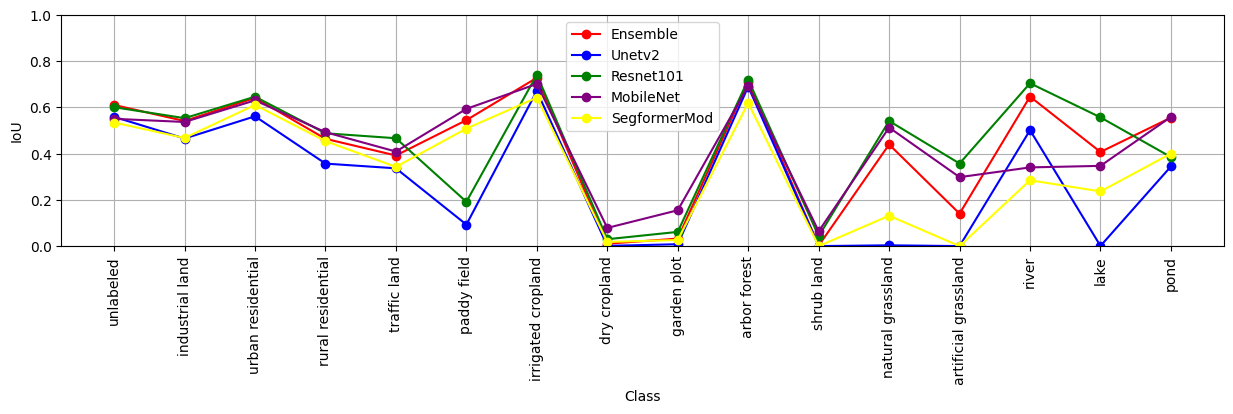

In [6]:
import matplotlib.pyplot as plt
# data = {'Unet': {'IoU': [], 'mIoU':x, ....}}
def plot_IoU_perclass(data):	
	labels = {
		0:"unlabeled",
		1:"industrial land",
		2:"urban residential",
		3:"rural residential",
		4:"traffic land",
		5:"paddy field",
		6:"irrigated cropland",
		7:"dry cropland",
		8:"garden plot",
		9:"arbor forest",
		10:"shrub land",
		11:"natural grassland",
		12:"artificial grassland",
		13:"river",
		14:"lake",
		15:"pond",
	}
	fig, ax = plt.subplots()
	fig.set_size_inches(15,3) 
	colors = ['red', 'blue', 'green', 'purple', 'yellow']
	for i,net in enumerate(data.keys()):		
		perclass_IoU = data[net]['perclass_IoU']
		plt.plot(perclass_IoU, marker='o', color=colors[i], label=net)
	ax.legend()
	x_numbers = [_ for _ in range(len(labels.items()))]	
	plt.xticks(x_numbers, labels.values(), rotation=90)
	ax.set_xlabel("Class")
	ax.set_ylabel("IoU")
	plt.ylim(0,1)	
	plt.grid()
	plt.show()
plot_IoU_perclass(data)

	